In [11]:
import geopandas as gpd
import geoplot as gplt
import numpy as np
import scipy.stats as stats
from recommender import recommend_visualisations
from util import VarIntent, Intents

In [2]:
iita_trial_sites = gpd.read_file("Yam_trial_sites.geojson")
iita_trial_sites.head()

OBJECTID     PRojNO                                         ProjectDes  \
0         1  PJ-002451   ?limination des pesticides obsol?tes y compri...   
1         2  PJ-002451   ?limination des pesticides obsol?tes y compri...   
2         3  PJ-002451   ?limination des pesticides obsol?tes y compri...   
3         4  PJ-002316   Aflasafe Technical Transfer and Commercializa...   
4         5  PJ-002316   Aflasafe Technical Transfer and Commercializa...   

                Project_Ma  Country      States LGA_Distri  \
0           Kpindou, Douro     Mali  Tombouctou    Goundam   
1           Kpindou, Douro  Senegal       Louga      Louga   
2           Kpindou, Douro  Senegal       Matam      Kanel   
3  Konlambigue, Matieyedou  Senegal       Matam    Ranerou   
4  Konlambigue, Matieyedou  Senegal       Matam    Ranerou   

              Cities_tow      Crops       lat  ...  MANGANESE NITROGEN  \
0                  Tonka      Maize  16.13417  ...         36      412   
1        Keur Demba Awa,      Maize  15.53635  ...         80      384   
2   Sinthiou Sadio Aliou      Maize  15.49049  ...        121      493   
3                Ranerou  Groundnut  15.30153  ...         81      457   
4                Ranerou  Groundnut  15.30153  ...         81      457   

   SODIUM  PHOSPHORUS  ZINC  Rain   Temp_C   pH    OC  \
0     421         331    77   202  28.0250  7.6  0.17   
1     188         827   416   362  26.6500  7.2  0.84   
2     250         479   364   386  29.8833  6.6  0.63   
3     174         347   339   481  29.2083  6.3  0.69   
4     174         347   339   481  29.2083  6.3  0.69   

                     geometry  
0   POINT (-3.74604 16.13417)  
1  POINT (-16.26644 15.53635)  
2  POINT (-13.17459 15.49049)  
3  POINT (-13.95765 15.30153)  
4  POINT (-13.95765 15.30153)  

[5 rows x 29 columns]

In [3]:
iita_trial_sites.replace("", np.nan, inplace=True)
iita_trial_sites.dropna(subset=["Crops", "CALCIUM"], inplace=True)

<Axes: xlabel='Crops'>

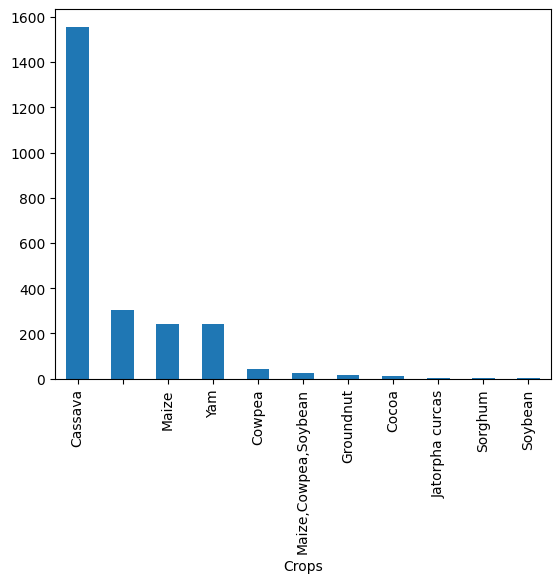

In [4]:
iita_trial_sites["Crops"].value_counts().plot(kind="bar")

In [13]:
its = iita_trial_sites[iita_trial_sites["Crops"].isin(["Yam", "Maize", "Cassava", "Cowpea", "Groundnut"])]
its.sort_values("CALCIUM")

OBJECTID     PRojNO                                         ProjectDes  \
2136      2137  PJ-002957   TAAT Cassava Compact (Establishing Cassava as...   
2038      2039  PJ-001491   Liberia: Smallholder Agricultural Productivit...   
2221      2222  PJ-002254   ACAI : African Cassava Agronomy Initiative (O...   
2229      2230  PJ-002254   ACAI : African Cassava Agronomy Initiative (O...   
2224      2225  PJ-002254   ACAI : African Cassava Agronomy Initiative (O...   
...        ...        ...                                                ...   
36          37  PJ-002340   Building Nutritious Food Baskets: Scaling up ...   
17          18  PJ-002344   Utilisation of wild relatives in the breeding...   
2301      2302  PJ-002957   TAAT Cassava Compact (Establishing Cassava as...   
22          23  PJ-002344   Utilisation of wild relatives in the breeding...   
0            1  PJ-002451   ?limination des pesticides obsol?tes y compri...   

           Project_Ma  Country                      States      LGA_Distri  \
2136   Abass, Adebayo                                                        
2038   Asiedu, Robert  Liberia            Grand Cape Mount  Commonwealth C   
2221   PYPERS, Pieter  Nigeria                         Edo      Orhionmwon   
2229   PYPERS, Pieter  Nigeria                         Edo      Orhionmwon   
2224   PYPERS, Pieter  Nigeria                         Edo      Orhionmwon   
...               ...      ...                         ...             ...   
36      Menkir, Abebe   Gambia  Kanifing Municipal Council          Banjul   
17    Boukar, Ousmane    Niger                      Zinder           Miria   
2301   Abass, Adebayo     Togo                    Maritime           Golfe   
22    Boukar, Ousmane    Niger                      Maradi      Madarounfa   
0      Kpindou, Douro     Mali                  Tombouctou         Goundam   

        Cities_tow    Crops        lat  ...  MANGANESE NITROGEN  SODIUM  \
2136        Houedo  Cassava   6.496300  ...      -9999    -9999   -9999   
2038  Sirleaf Town  Cassava   6.747650  ...      -9999    -9999   -9999   
2221          Uvbe  Cassava   6.280046  ...         67     1045     145   
2229          Uvbe  Cassava   6.280698  ...         67     1045     145   
2224          Uvbe  Cassava   6.280195  ...         67     1045     145   
...            ...      ...        ...  ...        ...      ...     ...   
36         Kilissi    Maize  13.451290  ...        116      672     650   
17          Zinder   Cowpea  13.801810  ...         71      582     325   
2301          Lome  Cassava   6.133650  ...        181     1359     486   
22          Maradi   Cowpea  13.500970  ...        101      561     437   
0            Tonka    Maize  16.134170  ...         36      412     421   

      PHOSPHORUS  ZINC  Rain     Temp_C      pH       OC  \
2136       -9999 -9999 -9999 -9999.0000 -9999.0 -9999.00   
2038       -9999 -9999  4185    25.8917 -9999.0 -9999.00   
2221         858   527  1956    26.1167     5.6     0.19   
2229         858   527  1956    26.1167     5.6     0.19   
2224         858   527  1956    26.1167     5.6     0.19   
...          ...   ...   ...        ...     ...      ...   
36          1508   447   863    26.3167 -9999.0 -9999.00   
17           318   303   369    27.9000     7.0     0.87   
2301        2880   612   932    27.5000     5.8     0.30   
22           392   378   449    27.7667     6.7     1.07   
0            331    77   202    28.0250     7.6     0.17   

                        geometry  
2136     POINT (2.42680 6.49630)  
2038   POINT (-11.33812 6.74765)  
2221     POINT (6.04633 6.28005)  
2229     POINT (6.04661 6.28070)  
2224     POINT (6.04605 6.28019)  
...                          ...  
36    POINT (-16.57300 13.45129)  
17      POINT (8.98527 13.80181)  
2301     POINT (1.22311 6.13365)  
22      POINT (7.10363 13.50097)  
0      POINT (-3.74604 16.13417)  

[2101 rows x 29 columns]

In [18]:
its = its[its["CALCIUM"] != -9999]
its = its[its["pH"] != -9999]
its.sort_values("pH")

OBJECTID     PRojNO                                         ProjectDes  \
2433      2434  PJ-001491   Liberia: Smallholder Agricultural Productivit...   
1839      1840  PJ-001491   Liberia: Smallholder Agricultural Productivit...   
2449      2450  PJ-001491   Liberia: Smallholder Agricultural Productivit...   
2168      2169  PJ-001491   Liberia: Smallholder Agricultural Productivit...   
2323      2324  PJ-001491   Liberia: Smallholder Agricultural Productivit...   
...        ...        ...                                                ...   
22          23  PJ-002344   Utilisation of wild relatives in the breeding...   
17          18  PJ-002344   Utilisation of wild relatives in the breeding...   
5            6  PJ-002316   Aflasafe Technical Transfer and Commercializa...   
1            2  PJ-002451   ?limination des pesticides obsol?tes y compri...   
0            1  PJ-002451   ?limination des pesticides obsol?tes y compri...   

                   Project_Ma  Country       States         LGA_Distri  \
2433           Asiedu, Robert  Liberia    Rivercess  Central Rivercess   
1839           Asiedu, Robert  Liberia         Bomi             Senjeh   
2449           Asiedu, Robert  Liberia        Sinoe              Butaw   
2168           Asiedu, Robert  Liberia  Montserrado         Careysburg   
2323           Asiedu, Robert  Liberia  Grand Bassa     District No. 2   
...                       ...      ...          ...                ...   
22            Boukar, Ousmane    Niger       Maradi         Madarounfa   
17            Boukar, Ousmane    Niger       Zinder              Miria   
5     Konlambigue, Matieyedou     Mali        Kayes              Nioro   
1              Kpindou, Douro  Senegal        Louga              Louga   
0              Kpindou, Douro     Mali   Tombouctou            Goundam   

                   Cities_tow      Crops        lat  ...  MANGANESE NITROGEN  \
2433              Sannah town    Cassava   5.908441  ...         34     1399   
1839              Banana farm    Cassava   6.882740  ...         47     1397   
2449                  Panama,    Cassava   5.165828  ...         54     1489   
2168  Varney Goyah, Franktown    Cassava   6.417240  ...         55     1500   
2323          Compounds 1 & 2    Cassava   6.161571  ...         41     1376   
...                       ...        ...        ...  ...        ...      ...   
22                     Maradi     Cowpea  13.500970  ...        101      561   
17                     Zinder     Cowpea  13.801810  ...         71      582   
5              NIORO DU SAHEL  Groundnut  15.234390  ...         57      497   
1             Keur Demba Awa,      Maize  15.536350  ...         80      384   
0                       Tonka      Maize  16.134170  ...         36      412   

      SODIUM  PHOSPHORUS  ZINC  Rain   Temp_C   pH    OC  \
2433     166        1015   548  2794  25.5083  4.7  0.13   
1839     160        1214   598  3392  26.1083  4.8  0.24   
2449     182        2286   542  3857  25.3750  4.8  0.26   
2168     154        1197   643  3711  26.0333  4.8  0.71   
2323     180        1264   476  2943  25.7750  4.8  0.11   
...      ...         ...   ...   ...      ...  ...   ...   
22       437         392   378   449  27.7667  6.7  1.07   
17       325         318   303   369  27.9000  7.0  0.87   
5        248         451   219   420  28.9750  7.0  0.63   
1        188         827   416   362  26.6500  7.2  0.84   
0        421         331    77   202  28.0250  7.6  0.17   

                        geometry  
2433    POINT (-9.23682 5.90844)  
1839   POINT (-10.79313 6.88274)  
2449    POINT (-9.11846 5.16583)  
2168   POINT (-10.56503 6.41724)  
2323    POINT (-9.97823 6.16157)  
...                          ...  
22      POINT (7.10363 13.50097)  
17      POINT (8.98527 13.80181)  
5      POINT (-9.59252 15.23439)  
1     POINT (-16.26644 15.53635)  
0      POINT (-3.74604 16.13417)  

[2093 rows x 29 columns]

<Axes: xlabel='Crops'>

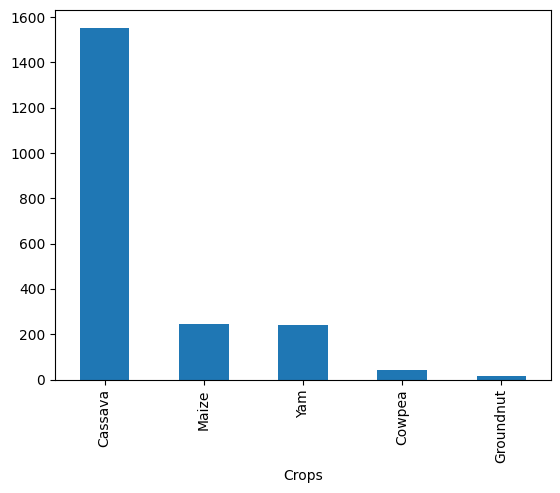

In [7]:
its["Crops"].value_counts().plot(kind="bar")

In [17]:
its.to_file("test_iita_crop_trial_sites.geojson", driver="GeoJSON")

M [Encoding(variable='Crops', encoding='SHAPE'), Encoding(variable='Crops', encoding='COLOR_HUE_C'), Encoding(variable='CALCIUM', encoding='SIZE'), Encoding(variable='CALCIUM', encoding='COLOR_LIGHTNESS_H'), Encoding(variable='CALCIUM', encoding='COLOR_LIGHTNESS_L'), Encoding(variable='CALCIUM', encoding='COLOR_HUE'), Encoding(variable='ALUM', encoding='SIZE'), Encoding(variable='ALUM', encoding='COLOR_LIGHTNESS_H'), Encoding(variable='ALUM', encoding='COLOR_LIGHTNESS_L'), Encoding(variable='ALUM', encoding='COLOR_HUE'), Encoding(variable='BORON', encoding='SIZE'), Encoding(variable='BORON', encoding='COLOR_LIGHTNESS_H'), Encoding(variable='BORON', encoding='COLOR_LIGHTNESS_L'), Encoding(variable='BORON', encoding='COLOR_HUE')]
Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='SIZE'), Encoding(variable='Crops', encoding='SHAPE')])


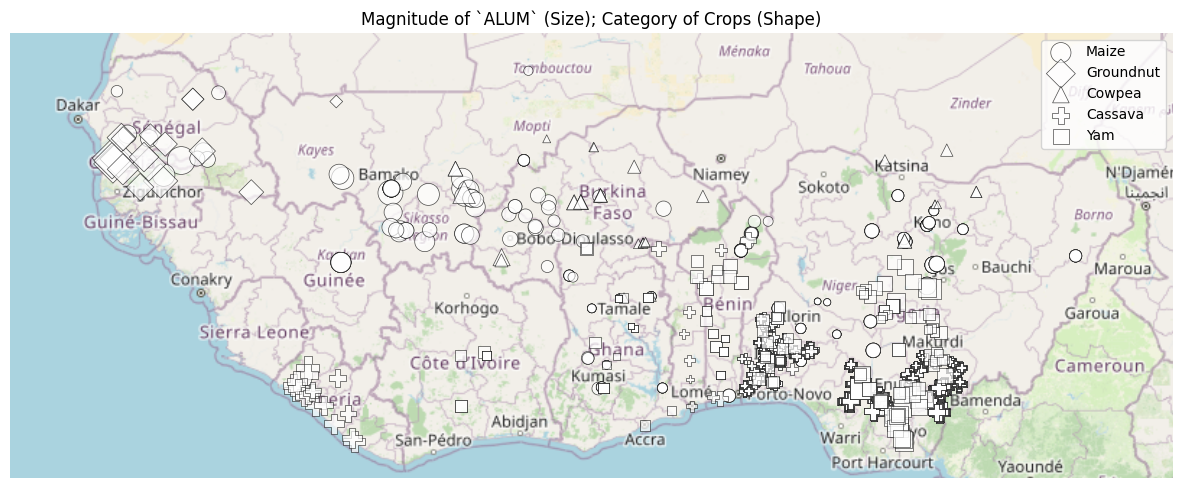

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='COLOR_LIGHTNESS_H'), Encoding(variable='Crops', encoding='SHAPE')])


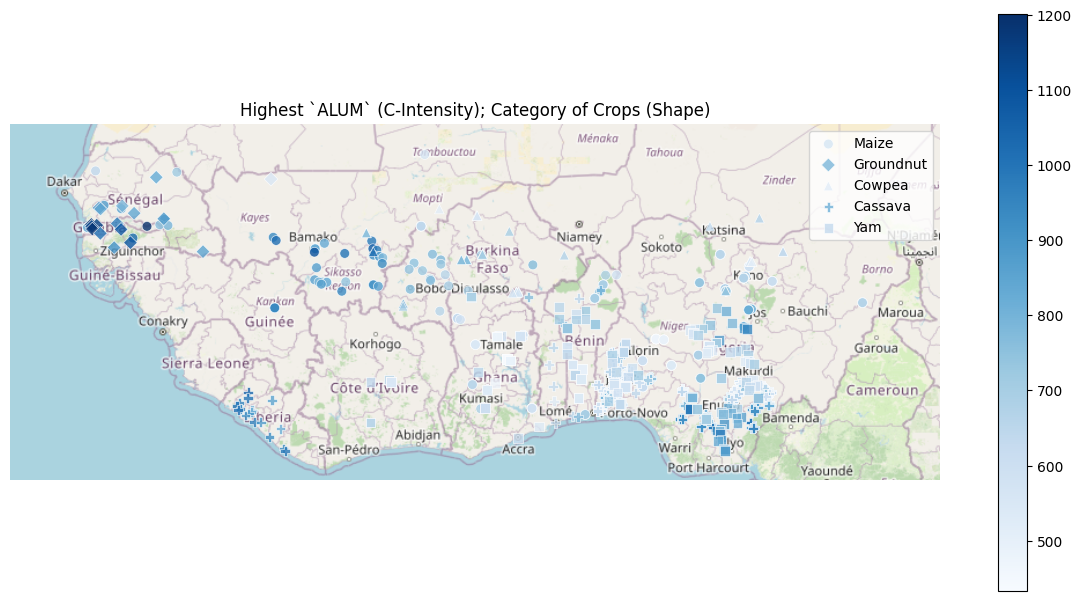

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='COLOR_LIGHTNESS_L'), Encoding(variable='Crops', encoding='SHAPE')])


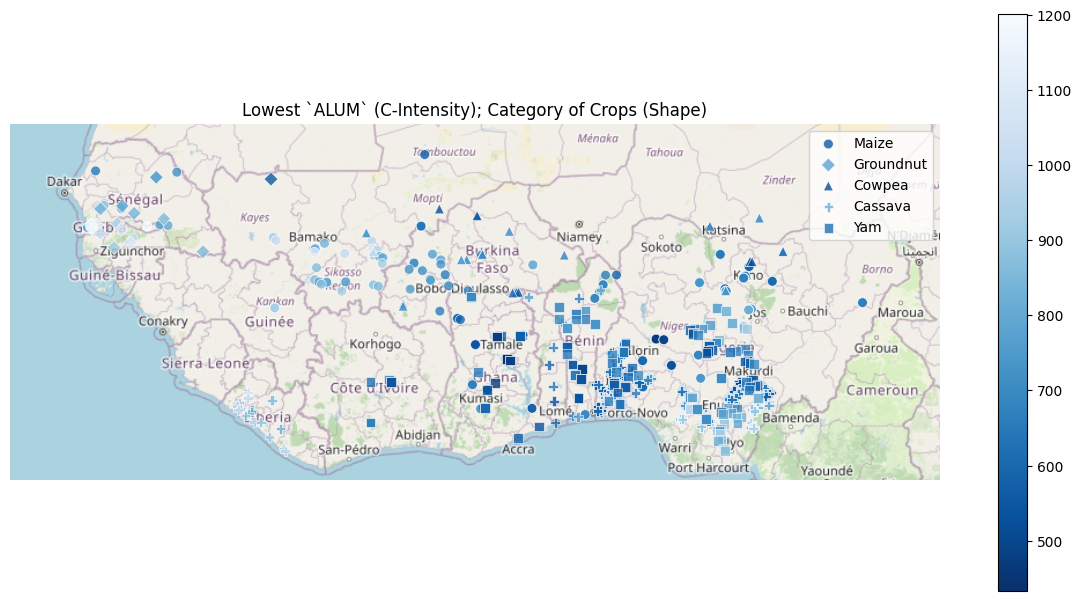

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='COLOR_HUE'), Encoding(variable='Crops', encoding='SHAPE')])


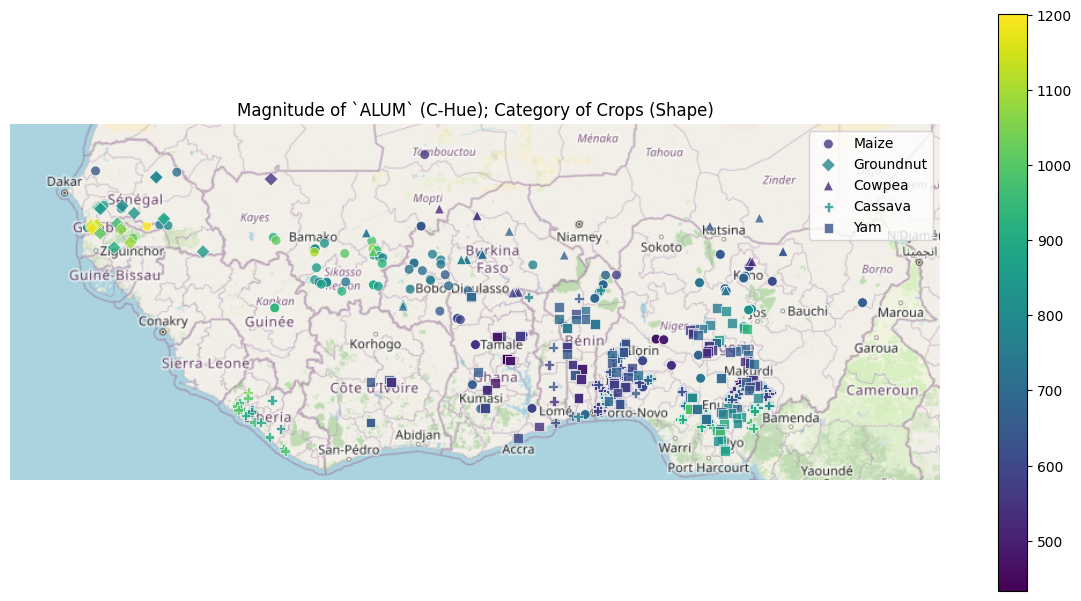

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='SIZE'), Encoding(variable='Crops', encoding='COLOR_HUE_C')])
Args {'scale': 'ALUM', 'limits': (4, 20), 'edgecolor': 'white', 'alpha': 0.8, 'legend': True, 'hue': 'Crops', 'cmap': 'tab10', 'linewidth': 0.5}


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


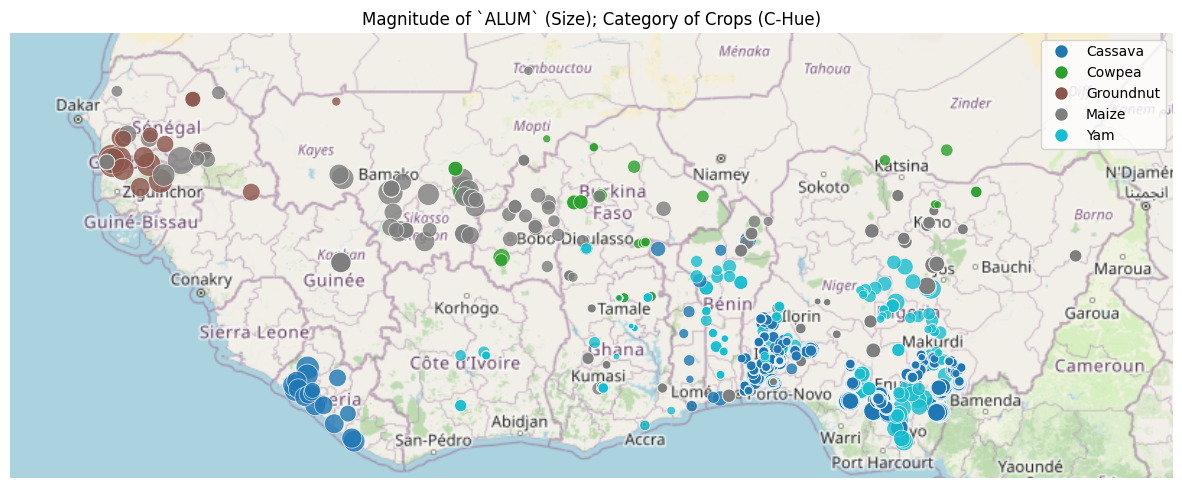

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='COLOR_LIGHTNESS_H'), Encoding(variable='CALCIUM', encoding='SIZE'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


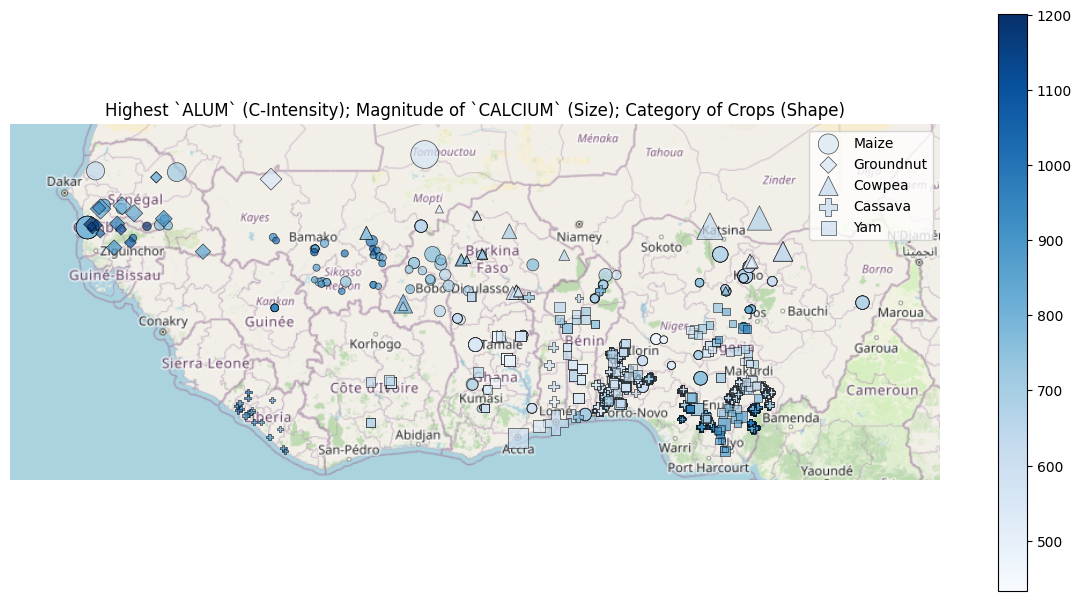

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='COLOR_LIGHTNESS_L'), Encoding(variable='CALCIUM', encoding='SIZE'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


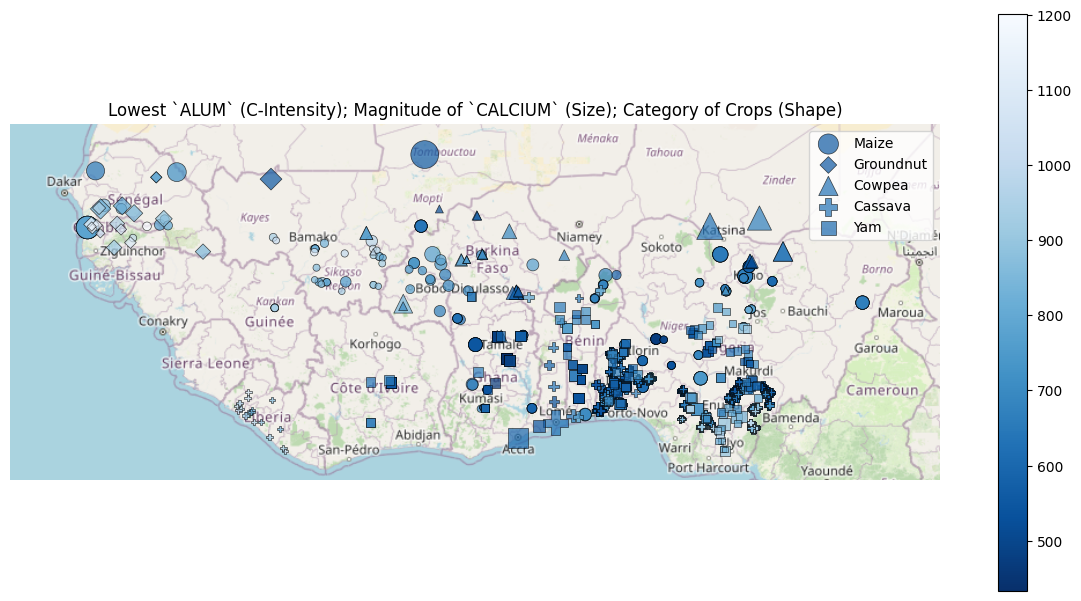

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='COLOR_HUE'), Encoding(variable='CALCIUM', encoding='SIZE'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


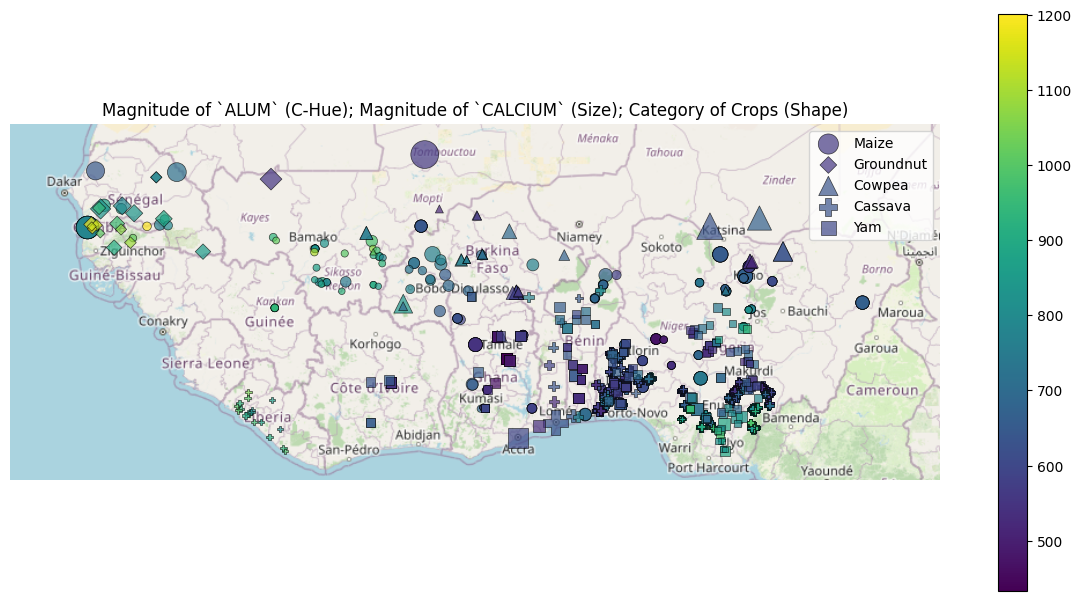

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='SIZE'), Encoding(variable='CALCIUM', encoding='COLOR_LIGHTNESS_H'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


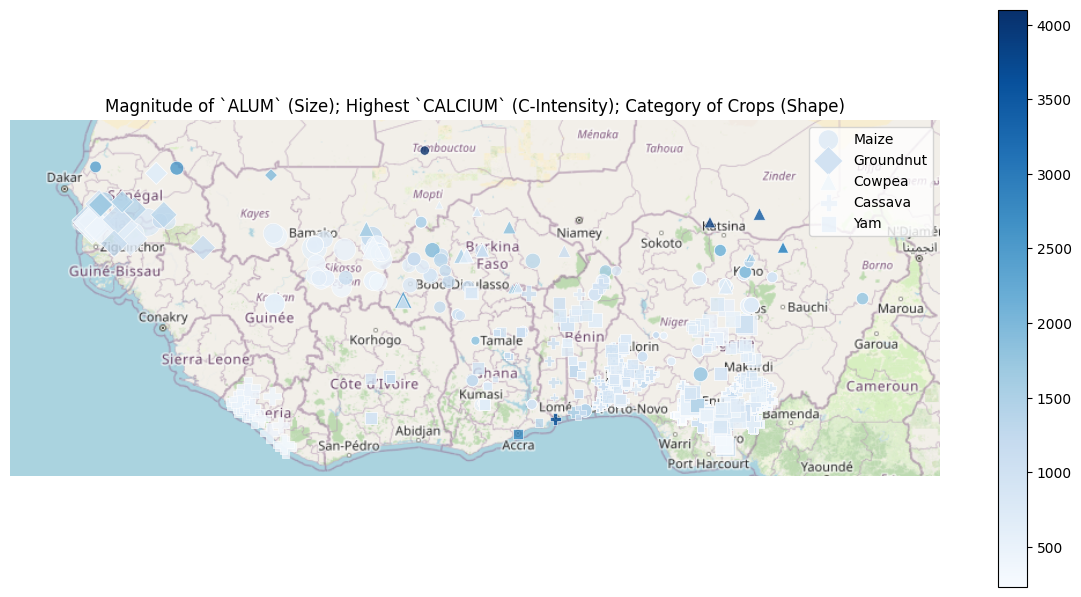

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='SIZE'), Encoding(variable='CALCIUM', encoding='COLOR_LIGHTNESS_L'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


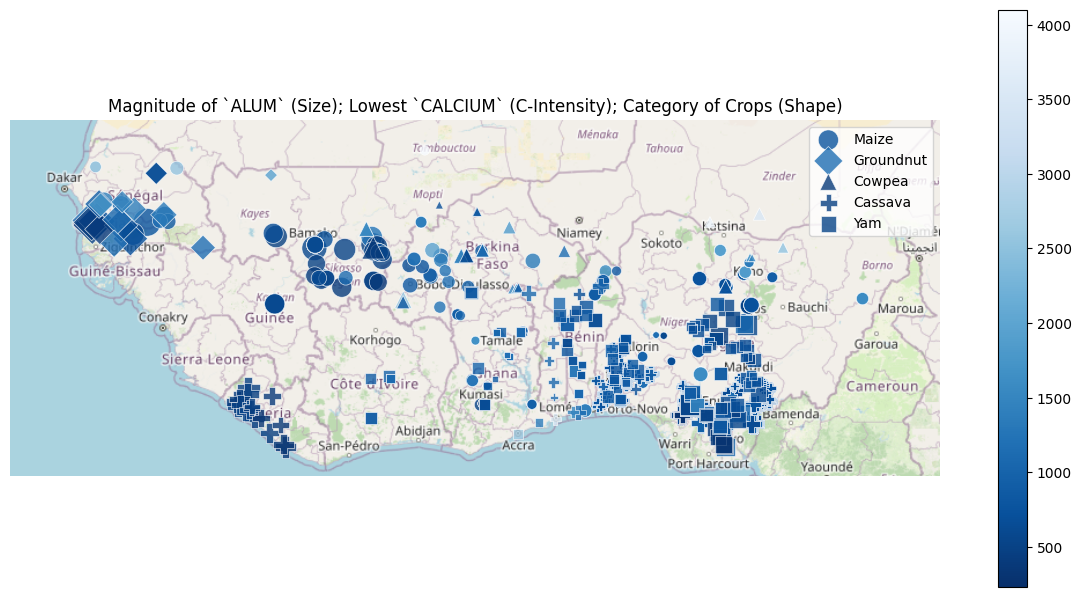

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='SIZE'), Encoding(variable='CALCIUM', encoding='COLOR_HUE'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


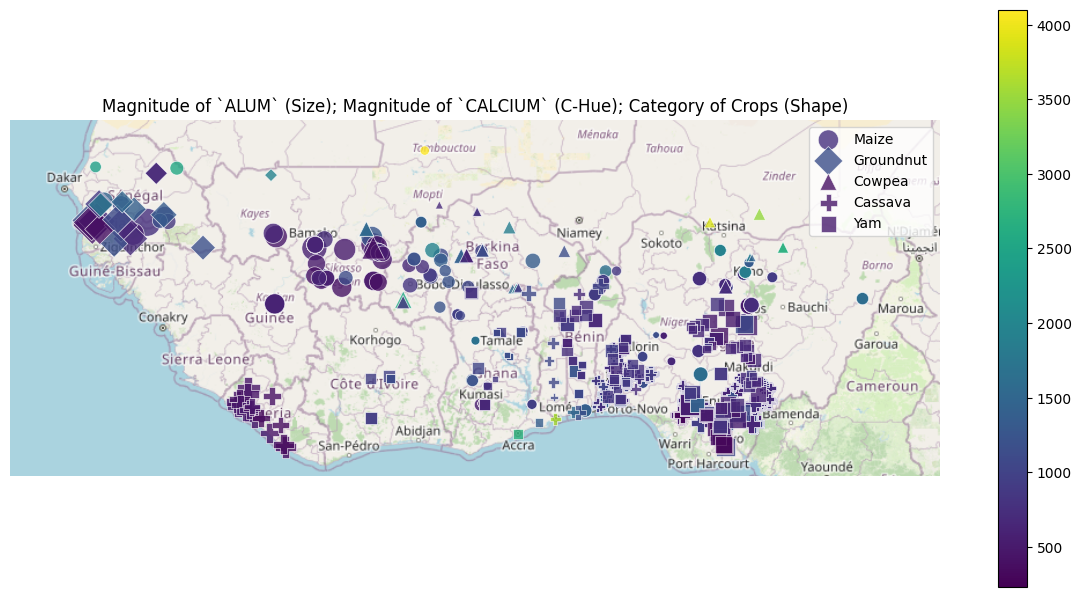

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='SIZE'), Encoding(variable='BORON', encoding='COLOR_LIGHTNESS_H'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


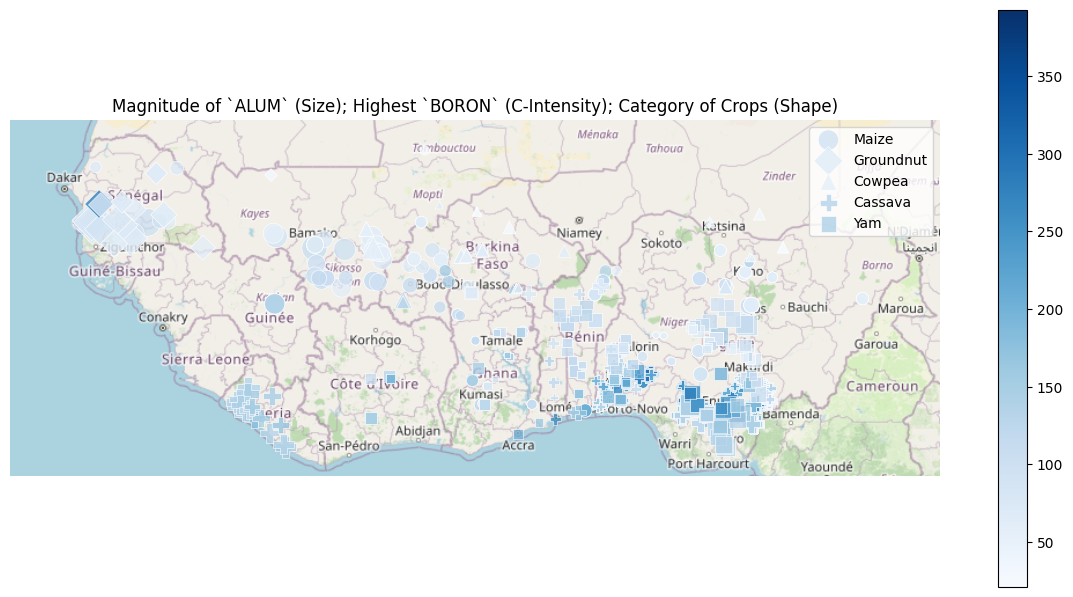

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='SIZE'), Encoding(variable='BORON', encoding='COLOR_LIGHTNESS_L'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


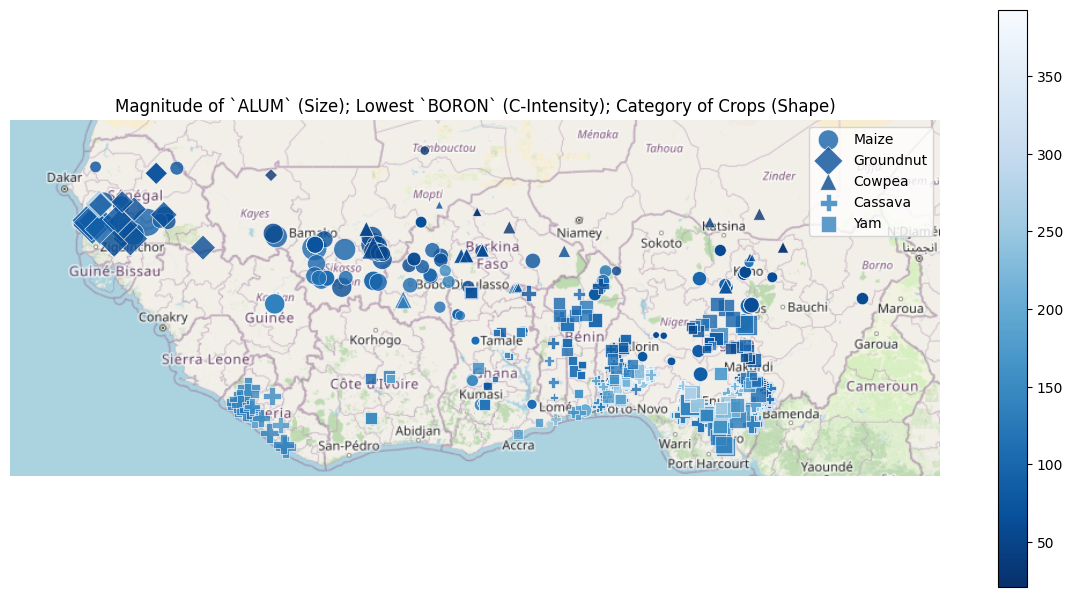

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='SIZE'), Encoding(variable='BORON', encoding='COLOR_HUE'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


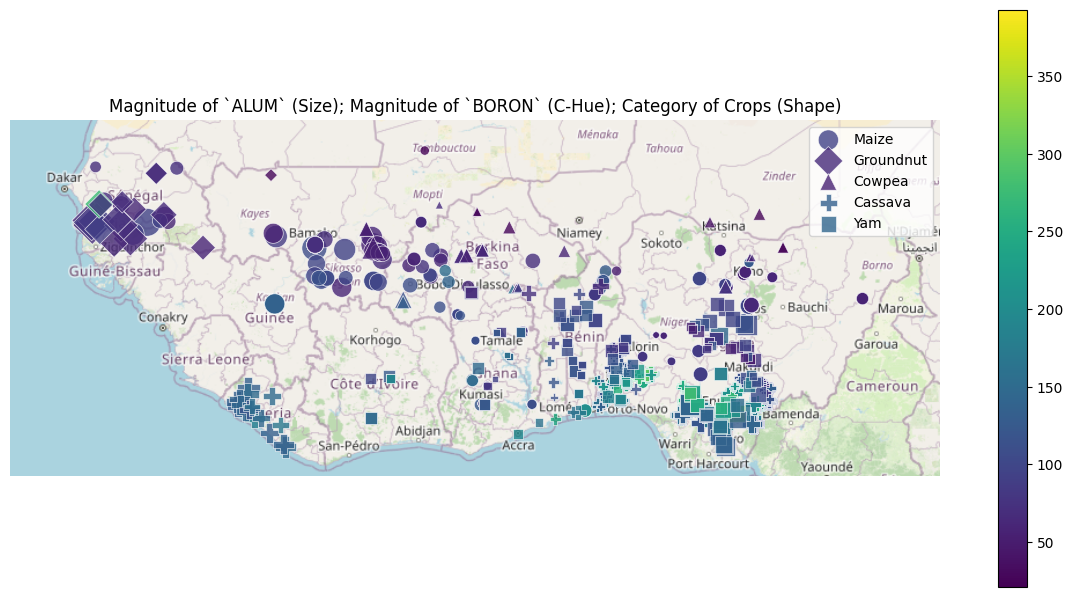

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='COLOR_LIGHTNESS_H'), Encoding(variable='BORON', encoding='SIZE'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


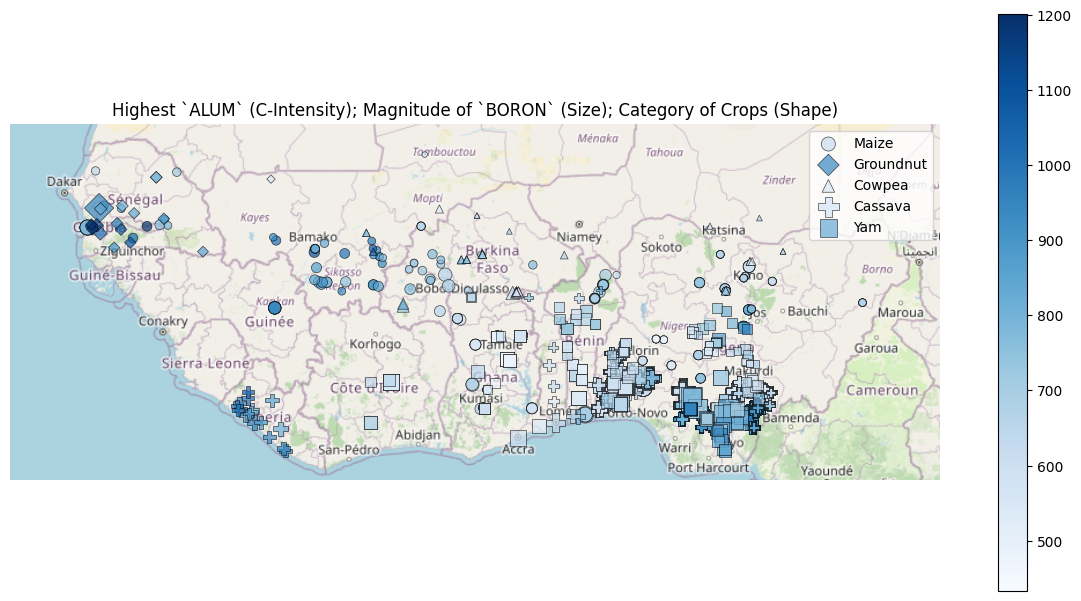

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='COLOR_LIGHTNESS_L'), Encoding(variable='BORON', encoding='SIZE'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


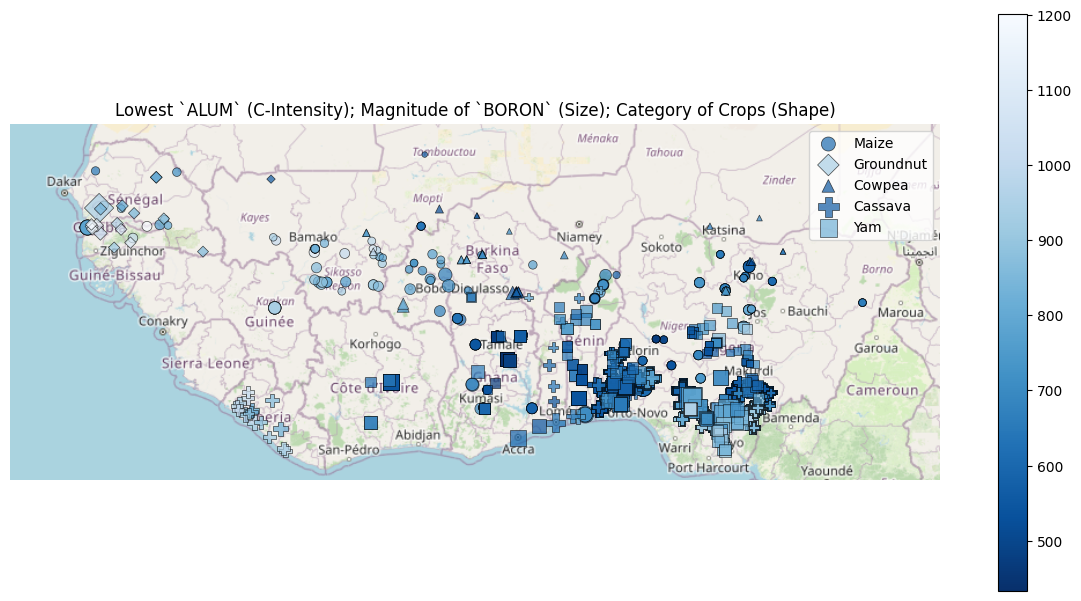

Plotting Design2(encodings=[Encoding(variable='ALUM', encoding='COLOR_HUE'), Encoding(variable='BORON', encoding='SIZE'), Encoding(variable='Crops', encoding='SHAPE')])


C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


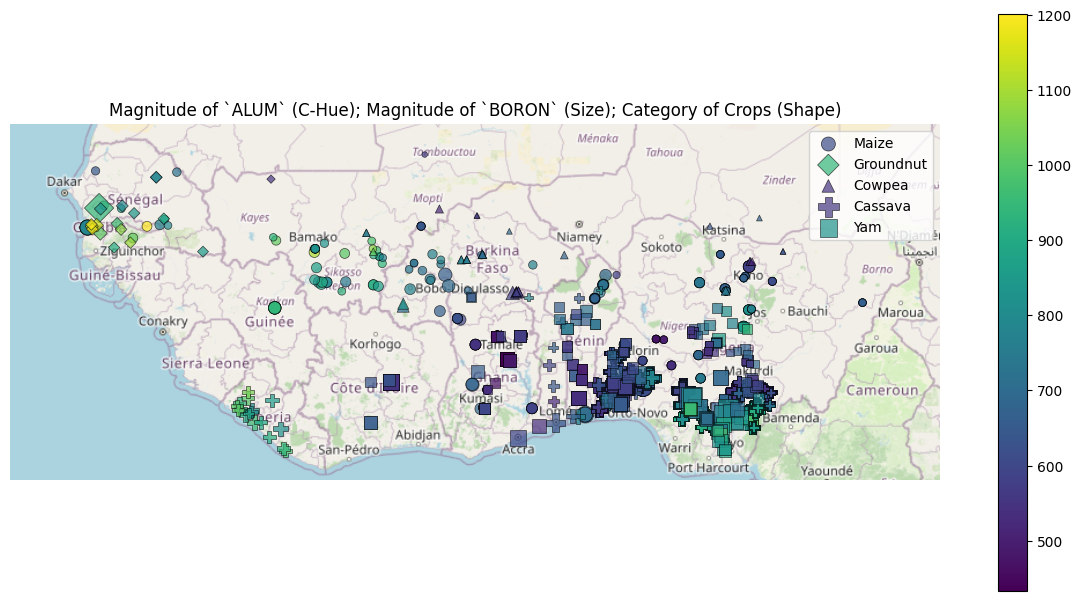

[<Design ['Crops']: ['SHAPE']>,
 <Design ['Crops']: ['COLOR_HUE_C']>,
 <Design ['CALCIUM']: ['SIZE']>,
 <Design ['CALCIUM']: ['COLOR_LIGHTNESS_H']>,
 <Design ['CALCIUM']: ['COLOR_LIGHTNESS_L']>,
 <Design ['CALCIUM']: ['COLOR_HUE']>,
 <Design ['ALUM']: ['SIZE']>,
 <Design ['ALUM']: ['COLOR_LIGHTNESS_H']>,
 <Design ['ALUM']: ['COLOR_LIGHTNESS_L']>,
 <Design ['ALUM']: ['COLOR_HUE']>,
 <Design ['BORON']: ['SIZE']>,
 <Design ['BORON']: ['COLOR_LIGHTNESS_H']>,
 <Design ['BORON']: ['COLOR_LIGHTNESS_L']>,
 <Design ['BORON']: ['COLOR_HUE']>]

In [12]:
recommend_visualisations("test_iita_crop_trial_sites.geojson",
                         variables=["Crops", "CALCIUM", "ALUM", "BORON"],
                         filter=["Crops", "ALUM"],
                         intent=VarIntent("ALUM", Intents.HIGH),
                         figsize=(15, 15))